### Connor Contursi - Task 1

# Data Processing

In [1]:
# module imports
import numpy as np
import pandas as pd

# Sklearn module imports
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#---------------------------------------------------

# Imports wave data in proper format for sklearn
wave_array = np.genfromtxt("wave_data.csv", delimiter = ",", dtype = str, usecols = range(6), skip_header = 1)
wave_array = wave_array.reshape(50, 119 * 6)
wave_data_array = pd.DataFrame(wave_array)

# Imports fistbump data in proper format for sklearn
fistbump_array = np.genfromtxt("fistbump_data.csv", delimiter = ",", dtype = str, usecols = range(6), skip_header = 1)
fistbump_array = fistbump_array.reshape(50, 119 * 6)
fistbump_data_array = pd.DataFrame(fistbump_array)

# Combines wave and fistbump data into single set
data = pd.concat([wave_data_array, fistbump_data_array])

# Creates y labels of half 0's and half 1's
y = np.zeros(100)
for a in range (50, 100, 1):
    y[a] = 1

### Logistic Regression Model & Results

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



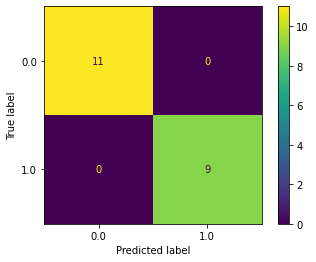

In [2]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.20)

# creates logistic regression classifier; fits data with trained sets; generates predictions from test split
model = LogisticRegression()
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Bias & Variance Characteristics
Given the results of the waving and fistbump data sets, there seems to be overfitting occuring given the little bias shown. 

### Decision Trees Model & Results

              precision    recall  f1-score   support

         0.0       0.45      0.50      0.48        10
         1.0       0.44      0.40      0.42        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



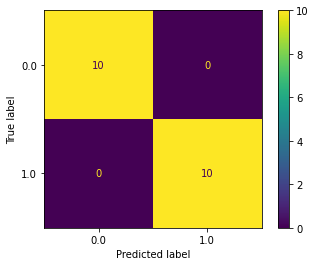

In [3]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.20)

# creates decision tree classifier; fits data with trained sets; generates predictions from test split
model = DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Bias & Variance Characteristics
With the results above from the waving and fistbump data sets, there seems to be some underfitting occuring in the model indicated by the low level of precision.

### Random Forests Model & Results

              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67        10
         1.0       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



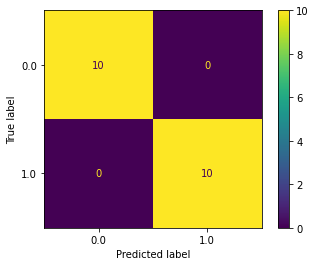

In [4]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.20)

# creates random forest classifier; fits data with trained sets; generates predictions from test split
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Bias & Variance Characteristics
Given the results above from the waving and fistbump data sets, there doesn't seem to be underfitting or overfitting occuring.